In [ ]:
from Weidman_Figures import *

pd.concat([pd.read_csv(f) for f in [
    'ECON 0150 _ Week 1 _ M_W 3PM.csv',
    'ECON 0150 _ Week 1 _ M_W 4_30PM.csv',
    'ECON 0150 _ Week 1 _ T_R 1PM.csv',
]], ignore_index=True).to_csv('Week_01_Survey.csv')

# Week 01 Demo
Let's get to know the class!

In [ ]:
# Replace with your file path
file_path = 'drive/MyDrive/TEACHING/ECON_0150/'

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sys


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv(file_path + 'Week_01/Week_01_Survey.csv')
data.columns

Index(['Unnamed: 0', 'Timestamp',
       'First and Last Initials (eg. Taylor Weidman -> TW)',
       'What is your favorite color?', 'What is your age?',
       'How many siblings to you have?',
       'Approximately how many miles away from Pittsburgh is your hometown?',
       'What is/are your major(s)?', 'What time did you wake up this morning?',
       'Did you like your statistics class?',
       'How excited are you for this class?'],
      dtype='object')

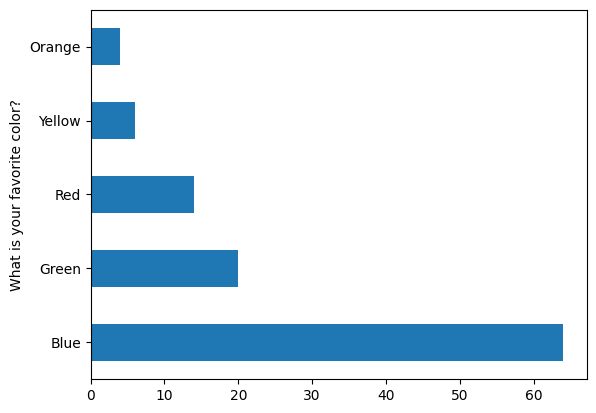

In [ ]:
data['What is your favorite color?'].value_counts().plot(kind='barh');

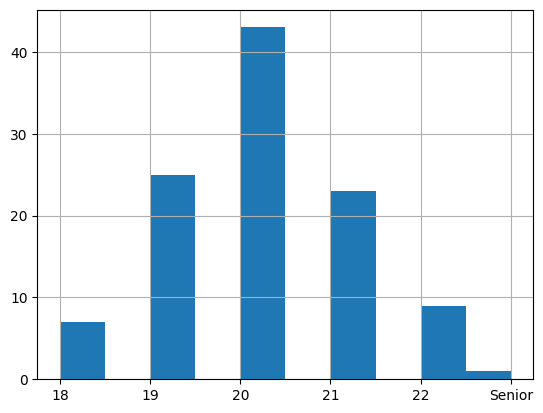

In [ ]:
data['What is your age?'].astype(str).sort_values().hist();

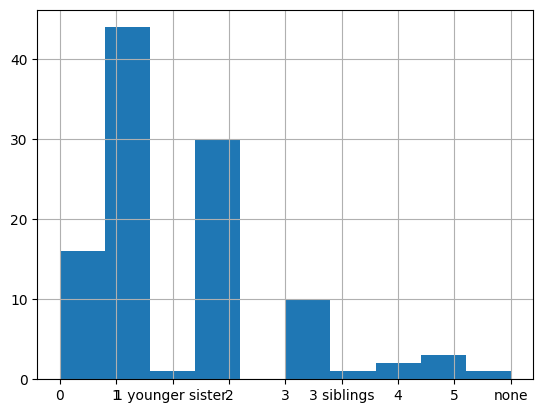

In [ ]:
data['How many siblings to you have?'].astype(str).sort_values().hist();

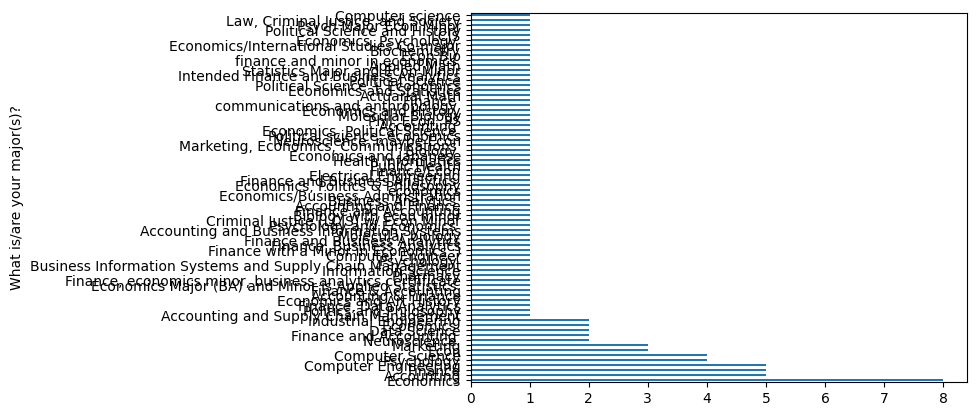

In [ ]:
data['What is/are your major(s)?'].value_counts().plot(kind='barh');

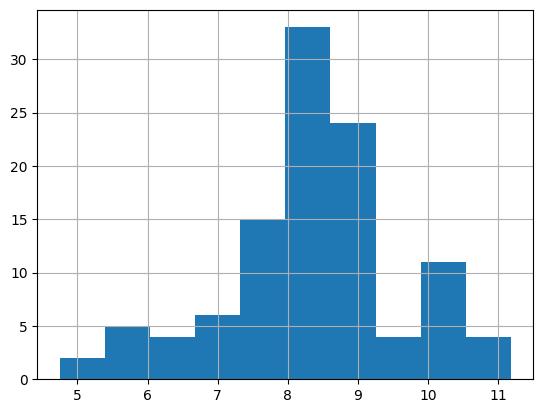

In [ ]:
data['What time did you wake up this morning?'] = pd.to_datetime(data['What time did you wake up this morning?'], errors='coerce')
data['What time did you wake up this morning?'].apply(lambda x: x.hour + x.minute / 60.0 if pd.notnull(x) else None).hist();

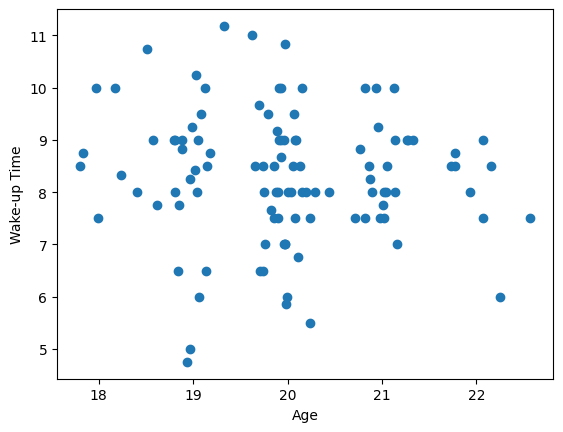

In [ ]:
x = pd.to_numeric(data['What is your age?'], errors='coerce')
x = x.dropna()
# jitter x
x = x + np.random.normal(0, 0.2, len(x))

y = data.loc[x.index, 'What time did you wake up this morning?'].apply(lambda x: x.hour + x.minute/60.0)

plt.scatter(x, y)
plt.xlabel('Age')
plt.ylabel('Wake-up Time');

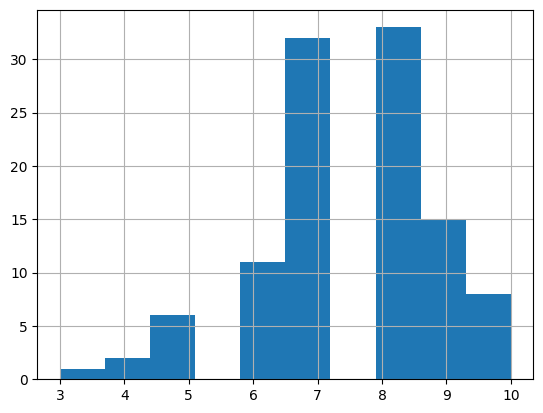

In [ ]:
data['How excited are you for this class?'].astype(float).sort_values().hist();


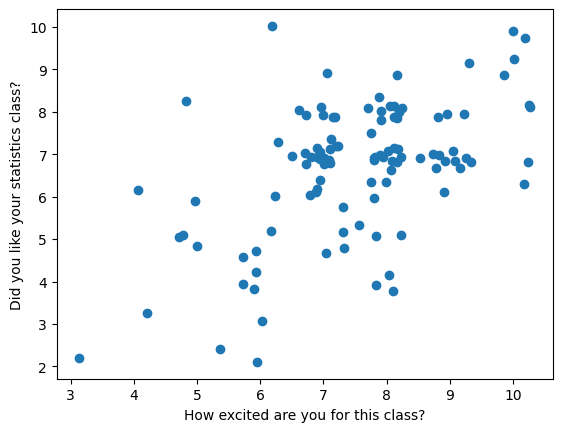

In [ ]:
x = data['How excited are you for this class?'].astype(float)
# jitter x
x = x + np.random.normal(0, 0.2, len(x))
y = data['Did you like your statistics class?'].astype(float)
# jitter y
y = y + np.random.normal(0, 0.2, len(y))
plt.scatter(x, y)
plt.xlabel('How excited are you for this class?')
plt.ylabel('Did you like your statistics class?');
